Meilleures features: ['Unnamed: 0', 'experience_level_encoded', 'job_title_encoded']


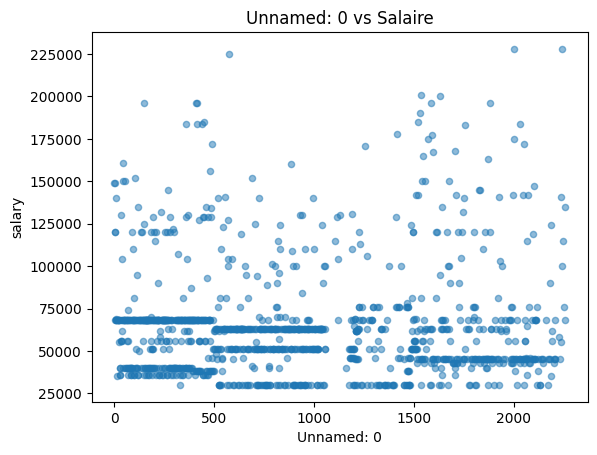

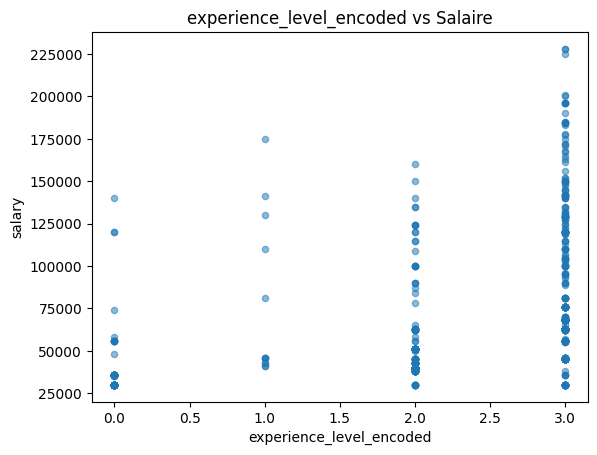

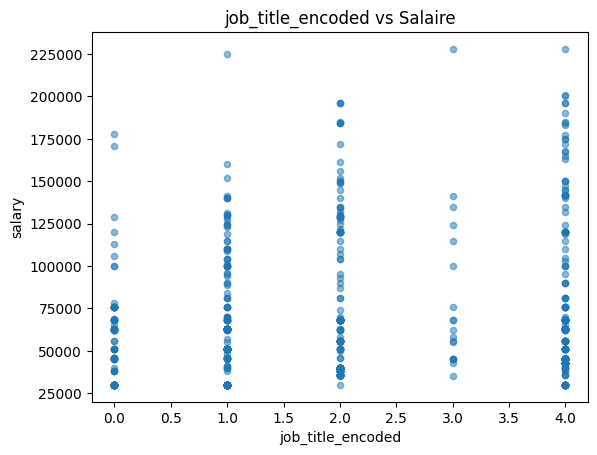


Analyse par niveau d'expérience:
                  count          mean           std      min      25%  \
experience_level                                                        
Entry             126.0  36111.111111  16151.394849  30000.0  30000.0   
Executive          13.0  76076.923077  46860.540505  41000.0  43000.0   
Mid               305.0  51786.885246  20609.874641  30000.0  40000.0   
Senior            727.0  75088.033012  33560.733276  30000.0  63000.0   

                      50%       75%       max  
experience_level                               
Entry             30000.0   36000.0  140000.0  
Executive         46000.0  110000.0  175000.0  
Mid               51000.0   51000.0  160000.0  
Senior            68000.0   69000.0  228000.0  


In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Chargement des données
df = pd.read_csv('datascience_salaries.csv')

# 2. Détection et normalisation du salaire
salary_col = next((col for col in ['salary_in_usd', 'salary', 'Salary_USD'] if col in df.columns), None)
if not salary_col:
    raise ValueError("Colonne de salaire non trouvée")

scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[[salary_col]])

# 3. Encodage des catégorielles
le = LabelEncoder()
categoricals = ['experience_level', 'employment_type', 'job_title', 'company_size']
for col in categoricals:
    if col in df.columns:
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))

# 4. Sélection de features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [col for col in num_cols if col not in [salary_col, 'salary_normalized']]

if num_cols:
    selector = SelectKBest(f_regression, k=min(3, len(num_cols)))
    X = df[num_cols].fillna(0)
    y = df[salary_col]
    
    selector.fit(X, y)
    selected = selector.get_support()
    best_features = X.columns[selected]
    
    print(f"Meilleures features: {list(best_features)}")
    
    # Visualisation
    for feature in best_features:
        df.plot.scatter(x=feature, y=salary_col, alpha=0.5)
        plt.title(f'{feature} vs Salaire')
        plt.show()
else:
    print("Aucune feature numérique disponible")

# 5. Analyse avancée
if 'experience_level' in df.columns:
    print("\nAnalyse par niveau d'expérience:")
    print(df.groupby('experience_level')[salary_col].describe())